In [1]:
import torch
import torch.nn as nn
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from ydata_profiling import ProfileReport

In [4]:
RANDOM_STATE = 42
NUM_EPOCHS = 2000

In [2]:
try:
    data = pd.read_csv('./datasets/6_class.csv', index_col=0)
except:
    data = pd.read_csv('/datasets/6_class.csv', index_col=0)
data.head()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color
0,3068,0.002400,0.1700,16.12,0,Red
1,3042,0.000500,0.1542,16.60,0,Red
2,2600,0.000300,0.1020,18.70,0,Red
3,2800,0.000200,0.1600,16.65,0,Red
4,1939,0.000138,0.1030,20.06,0,Red


## Предобработка и анализ данных

Изменим название колонок для удобства

In [5]:
data.rename(
    columns={
        'Temperature (K)': 'temperature',
        'Luminosity(L/Lo)': 'luminosity',
        'Radius(R/Ro)': 'radius',
        'Absolute magnitude(Mv)': 'abs_magnitude',
        'Star type': 'star_type',
        'Star color': 'star_color',
    },
    inplace=True
)
data.head ()

,temperature,luminosity,radius,abs_magnitude,star_type,star_color
0,3068,0.002400,0.1700,16.12,0,Red
1,3042,0.000500,0.1542,16.60,0,Red
2,2600,0.000300,0.1020,18.70,0,Red
3,2800,0.000200,0.1600,16.65,0,Red
4,1939,0.000138,0.1030,20.06,0,Red


In [6]:
data['star_color'] = data['star_color'].str.lower()

data['star_color'] = data['star_color'].str.replace('yellowish', 'yellow')
data['star_color'] = data['star_color'].str.replace('whitish', 'white')
data['star_color'] = data['star_color'].str.replace('pale', '')

data['star_color'] = data['star_color'].str.strip()
data['star_color'] = data['star_color'].str.replace(' ', '-')

In [7]:
data['star_color'].value_counts()

star_color
red              112
blue              56
blue-white        41
white             12
yellow-white      11
yellow             3
orange             2
yellow-orange      1
white-yellow       1
orange-red         1
Name: count, dtype: int64

In [8]:
data['star_color'] = data['star_color'].str.replace('white-yellow', 'yellow-white')
data['star_color'] = data['star_color'].str.replace('yellow-orange', 'yellow')
data['star_color'] = data['star_color'].str.replace('orange-red', 'orange')

In [9]:
data['star_color'].value_counts()

star_color
red             112
blue             56
blue-white       41
white            12
yellow-white     12
yellow            4
orange            3
Name: count, dtype: int64

d:\practicum\data_science\temperature_stars\venv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\practicum\data_science\temperature_stars\venv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\practicum\data_science\temperature_stars\venv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\practicum\data_science\temperature_stars\venv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option i

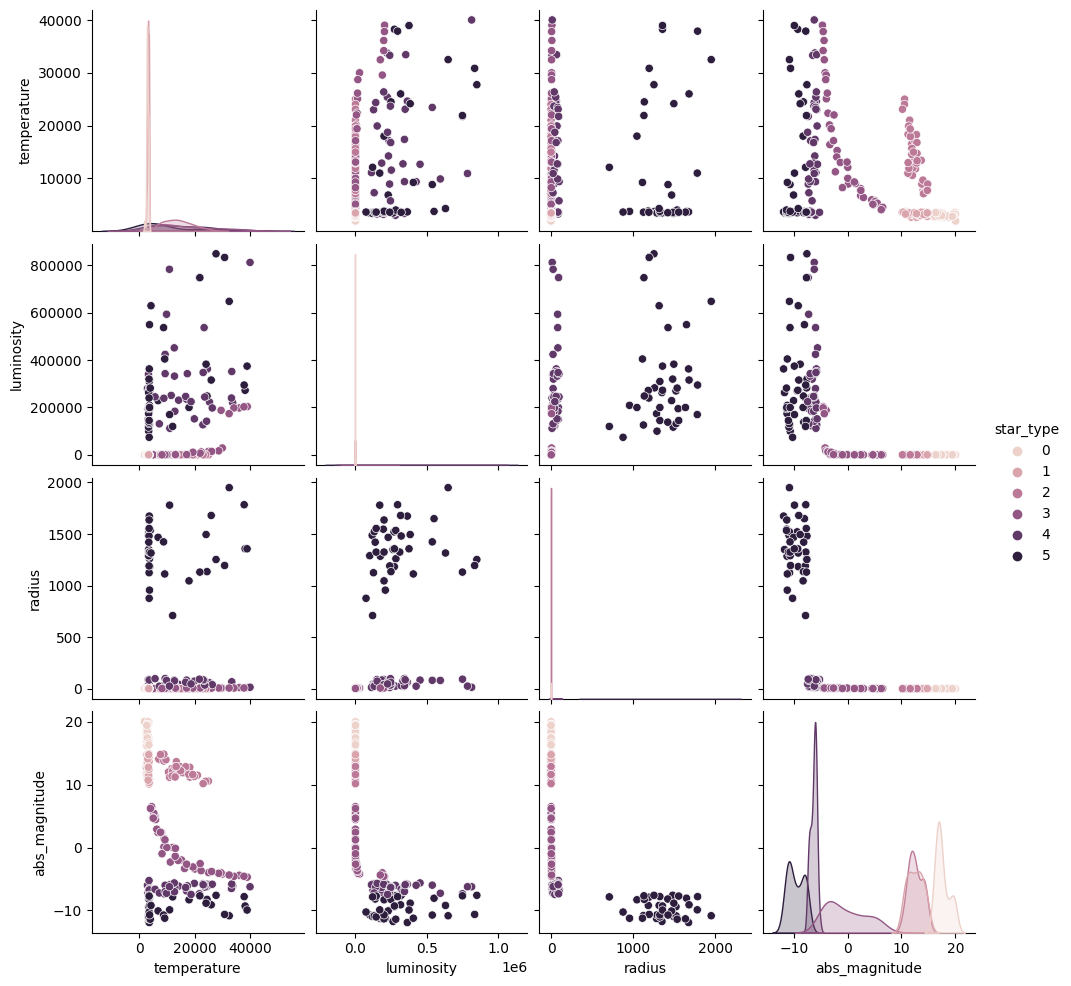

In [11]:
sns.pairplot(data, hue='star_type')

d:\practicum\data_science\temperature_stars\venv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\practicum\data_science\temperature_stars\venv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\practicum\data_science\temperature_stars\venv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\practicum\data_science\temperature_stars\venv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option i

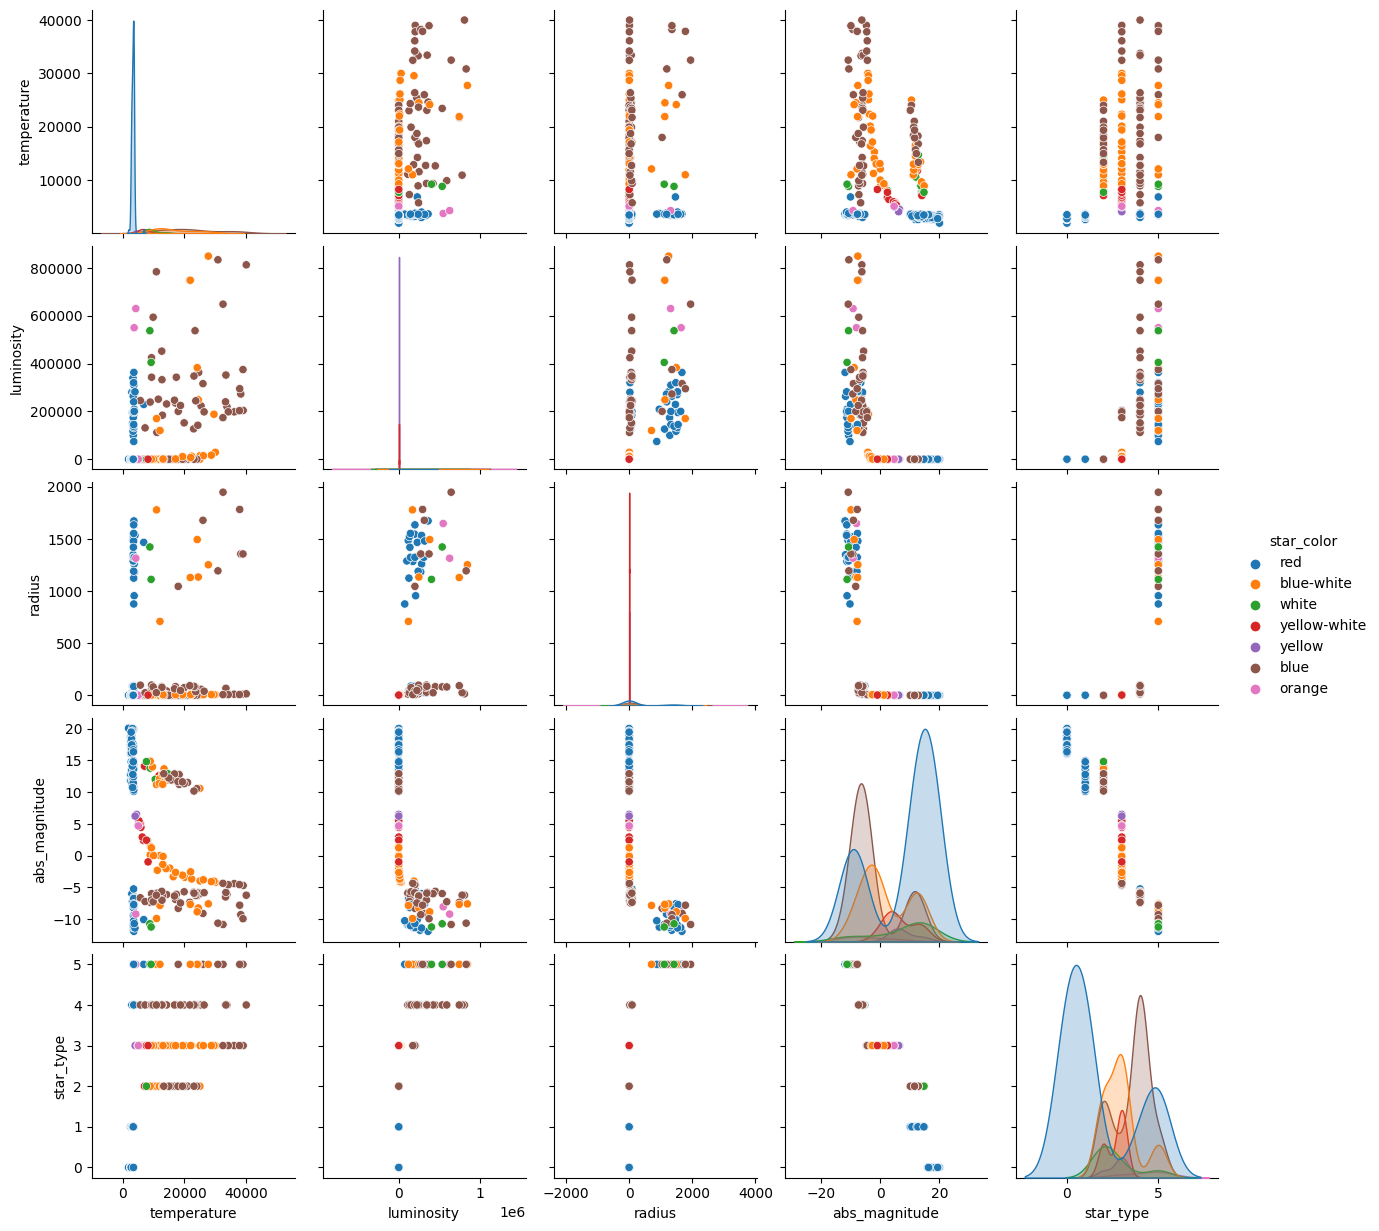

In [12]:
sns.pairplot(data, hue='star_color')